# Prototype for proper data handling

In [121]:
import os
from skimage import io, transform

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [2]:
df = pd.read_csv('info/all_data_info.csv')
df.head()

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
0,Barnett Newman,1955.0,abstract,15530.0,6911.0,9201912.0,wikiart,Color Field Painting,Uriel,train_only,True,102257.jpg
1,Barnett Newman,1950.0,abstract,14559.0,6866.0,8867532.0,wikiart,Color Field Painting,Vir Heroicus Sublimis,train_only,True,75232.jpg
2,kiri nichol,2013.0,NaN,9003.0,9004.0,1756681.0,NaN,Neoplasticism,NaN,test_only,False,32145.jpg
3,kiri nichol,2013.0,NaN,9003.0,9004.0,1942046.0,NaN,Neoplasticism,NaN,test_only,False,20304.jpg
4,kiri nichol,2013.0,NaN,9003.0,9004.0,1526212.0,NaN,Neoplasticism,NaN,test_only,False,836.jpg


In [3]:
df = df.drop(['pixelsx', 'pixelsy', 'size_bytes', 'source', 'title', 'artist_group', 'in_train', 'date'], axis=1)
df.head()

,artist,genre,style,new_filename
0,Barnett Newman,abstract,Color Field Painting,102257.jpg
1,Barnett Newman,abstract,Color Field Painting,75232.jpg
2,kiri nichol,NaN,Neoplasticism,32145.jpg
3,kiri nichol,NaN,Neoplasticism,20304.jpg
4,kiri nichol,NaN,Neoplasticism,836.jpg


In [4]:
print(len(df))
df = df.dropna()
print(len(df))

103250
101514


In [5]:
artist_s = df.groupby('artist').count().genre
artist_s.name = 'artist_count'
artist_df=  pd.DataFrame(artist_s)
artist_df.head()

,artist_count
artist,
Architect's visual,1
Capitain,1
François Leclerc du Tremblay,1
François Leclerc du Tremblay (detail),1
Fyodor Solntsev,37


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9521a0b390>]],
      dtype=object)

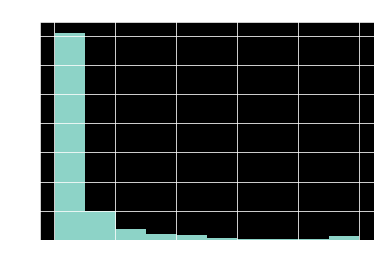

In [6]:
artist_df.hist()

In [7]:
genre_s = df.groupby('genre').count().artist
genre_s.name = 'genre_count'
genre_df = pd.DataFrame(genre_s)
genre_df.head()

,genre_count
genre,
abstract,9465
advertisement,82
allegorical painting,1033
animal painting,1552
battle painting,358


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95219593c8>]],
      dtype=object)

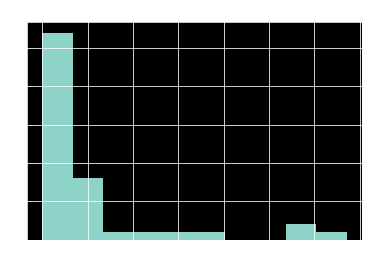

In [8]:
genre_df.hist()

In [9]:
style_s = df.groupby('style').count().artist
style_s.name = 'style_count'
style_df = pd.DataFrame(style_s)
style_df.head()

,style_count
style,
Abstract Art,973
Abstract Expressionism,2044
Academicism,971
Action painting,98
American Realism,277


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95218ded68>]],
      dtype=object)

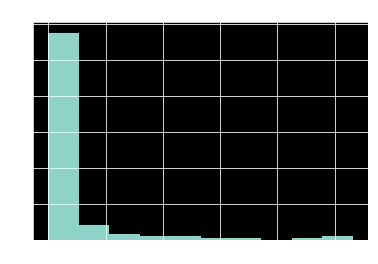

In [10]:
style_df.hist()

Not enough samples per class if we try to classify by painter -> genre and style.

In [11]:
df = df.drop('artist', axis=1)

In [12]:
genre_df.sort_values('genre_count', ascending=False)

,genre_count
genre,
portrait,16767
landscape,14959
genre painting,14217
abstract,9465
religious painting,7368
cityscape,5340
sketch and study,3626
illustration,3192
still life,3110


In [13]:
style_df.sort_values('style_count', ascending=False)

,style_count
style,
Impressionism,10638
Realism,10511
Romanticism,9244
Expressionism,6981
Post-Impressionism,5753
Art Nouveau (Modern),4887
Baroque,4394
Surrealism,4097
Symbolism,3471


In [16]:
MIN_SAMPLES = 3000
style_df[style_df.style_count >= MIN_SAMPLES]

,style_count
style,
Art Nouveau (Modern),4887
Baroque,4394
Expressionism,6981
Impressionism,10638
Post-Impressionism,5753
Realism,10511
Romanticism,9244
Surrealism,4097
Symbolism,3471


In [17]:
genre_df[genre_df.genre_count >= MIN_SAMPLES]

,genre_count
genre,
abstract,9465
cityscape,5340
genre painting,14217
illustration,3192
landscape,14959
portrait,16767
religious painting,7368
sketch and study,3626
still life,3110


In [78]:
common_df = df[(df['genre'].isin(genre_df[genre_df.genre_count >= MIN_SAMPLES].index)) & (df['style'].isin(style_df[style_df.style_count >= MIN_SAMPLES].index))]
len(common_df)

45876

In [74]:
pd.unique(common_df.genre)

array(['cityscape', 'landscape', 'genre painting', 'religious painting',
       'still life', 'illustration', 'portrait', 'sketch and study',
       'abstract'], dtype=object)

Remove abstract, perhaps sketch and study. Merge portraits and self-portraits. Look at the rest to decide what to merge or remove. Train a classifier on this to see accuracy, look at confusion matrix and:
- look at confusion matrix, merge what seems to be similar (also based on domain knowledge)
- remove what the classifier is still bad at classifying.

In [49]:
a = pd.unique(common_df['style'])
a.sort()
a

array(['Art Nouveau (Modern)', 'Baroque', 'Expressionism',
       'Impressionism', 'Post-Impressionism', 'Realism', 'Romanticism',
       'Surrealism', 'Symbolism'], dtype=object)

In [80]:
def lookup(df, other_df, col):
    return other_df.loc[df[col]]

common_df['style_count'] = common_df.apply(lookup, axis=1, args=(style_df, 'style'))
common_df['genre_count'] = common_df.apply(lookup, axis=1, args=(genre_df, 'genre'))
common_df.head()

/home/francois/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/francois/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,genre,style,new_filename,style_count,genre_count
9,cityscape,Romanticism,84512.jpg,9244,5340
11,landscape,Surrealism,70944.jpg,4097,14959
24,genre painting,Realism,28908.jpg,10511,14217
27,genre painting,Symbolism,24465.jpg,3471,14217
28,religious painting,Romanticism,7486.jpg,9244,7368


In [81]:
common_df.new_filename.name = 'filename'
common_df.columns = ['genre', 'style', 'filename', 'style_count', 'genre_count']
common_df.head()

,genre,style,filename,style_count,genre_count
9,cityscape,Romanticism,84512.jpg,9244,5340
11,landscape,Surrealism,70944.jpg,4097,14959
24,genre painting,Realism,28908.jpg,10511,14217
27,genre painting,Symbolism,24465.jpg,3471,14217
28,religious painting,Romanticism,7486.jpg,9244,7368


Save this in csv file when sure it's what is needed.

In [84]:
common_df = common_df.reset_index(drop=True)
common_df.head()

,genre,style,filename,style_count,genre_count
0,cityscape,Romanticism,84512.jpg,9244,5340
1,landscape,Surrealism,70944.jpg,4097,14959
2,genre painting,Realism,28908.jpg,10511,14217
3,genre painting,Symbolism,24465.jpg,3471,14217
4,religious painting,Romanticism,7486.jpg,9244,7368


In [100]:
common_df.to_csv('info/dataset_info.csv')

In [114]:
class PaintingsDataset(Dataset):
    """Dataset class to handle both genre and style label"""
    def __init__(self, csv_file, root_dir, tranform=None):
        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = tranform
        
        # do stuffs with the df here, in particular to have only data in root_dir
        available_files = os.listdir(self.root_dir)
        self.data = self.data[self.data.filename.isin(available_files)]
        
        self.genres = pd.unique(self.data['genre'])
        self.genres.sort()
        self.genre_to_idx = {self.genres[i]: i for i in range(len(self.genres))}
        
        self.styles = pd.unique(self.data['style'])
        self.styles.sort()
        self.style_to_idx = {self.styles[i]: i for i in range(len(self.styles))}
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        
        img_name = os.path.join(self.root_dir, self.data.loc[idx, 'filename'])
        image = io.imread(img_name)
        
        genre = self.data.loc[idx, 'genre']
        genre = self.genre_to_idx[genre]
        
        style = self.data.loc[idx, 'style']
        style = self.style_to_idx[style]

        if self.transform:
            image = self.transform(image)

        return image, genre, style

In [115]:
dataset = PaintingsDataset('info/dataset_info.csv', 'paintings64/portraits/')
len(dataset)

    Unnamed: 0     genre                 style    filename  style_count  \
15          15  portrait             Symbolism   95721.jpg         3471   
18          18  portrait               Baroque   40672.jpg         4394   
19          19  portrait               Realism   45276.jpg        10511   
21          21  portrait  Art Nouveau (Modern)   88434.jpg         4887   
30          30  portrait               Realism  100829.jpg        10511   

    genre_count  
15        16767  
18        16767  
19        16767  
21        16767  
30        16767  


8315

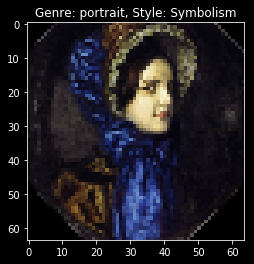

In [129]:
s, genre, style = dataset.__getitem__(15)

plt.imshow(s)
plt.title('Genre: {}, Style: {}'.format(dataset.genres[genre], dataset.styles[style]))
plt.show()